# Interpolation

In [1]:

%matplotlib inline 

import os
import scipy as scp
import scipy.misc as scm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=2, suppress=True)



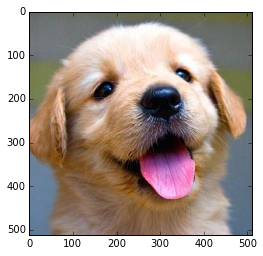

In [10]:

os.getcwd()
babe = scm.imread("puppy.jpg")
plt.imshow(babe)
plt.show()

In [5]:
data_url = "http://kinetics.nist.gov/janaf/html/C-067.txt"
pd.read_csv(data_url, sep='\t').head()

,,,,,,Methane (CH4),C1H4(g)
T(K),Cp,S,-[G-H(Tr)]/T,H-H(Tr),delta-f H,delta-f G,log Kf
0,0.,0.,INFINITE,-10.024,-66.911,-66.911,INFINITE
100,33.258,149.500,216.485,-6.698,-69.644,-64.353,33.615
200,33.473,172.577,189.418,-3.368,-72.027,-58.161,15.190
250,34.216,180.113,186.829,-1.679,-73.426,-54.536,11.395


data from http://kinetics.nist.gov/janaf/html/C-067.txt


In [7]:
height = np.array(np.random.rand(7))


print(height)
print("\n mean, ", height.mean())
print("\n minimum, ", height.min())
print("\n maximum, ", height.max())
print("\n Standard Deviation, ", height.std())



# Using Scipy
print("\n SCP Mode, ", scp.stats.mode(height))
print("\n SCP skewness, ", scp.stats.skew(height))
print("\n SCP Kutorsis, ", scp.stats.kurtosis(height))


[ 0.75  0.12  0.22  0.79  0.52  0.54  0.39]
('\n mean, ', 0.47482509195818168)
('\n minimum, ', 0.11662657686982436)
('\n maximum, ', 0.78894480397124078)
('\n Standard Deviation, ', 0.23320372516602852)
('\n SCP Mode, ', (array([ 0.12]), array([ 1.])))
('\n SCP skewness, ', -0.11418696592367421)
('\n SCP Kutorsis, ', -1.2528428736675585)


## Probability Distribution

(-0.007462693515075159, 0.97944995438956184)


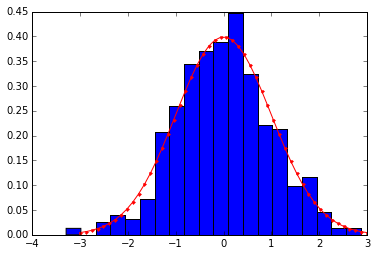

In [8]:
from scipy.stats import norm

x_norm = norm.rvs(size=500)

h = scp.histogram(x_norm, normed=True, bins=50)

# Print mean and standard deviation
print(norm.fit(x_norm))

plt.hist(x_norm, normed=True, bins=20)

x = np.linspace(-3,3,50)
plt.plot(x, norm.pdf(x), '.r-')

## Using 'Traps' as numerical integration tool

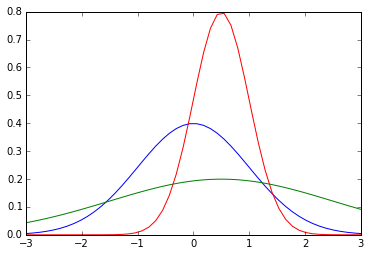

In [4]:
# Compute probability that certain values 
# lie between two endpoints.

from scipy.integrate import trapz

x1 = np.linspace(-3,3,100)

p = trapz(norm.pdf(x1), x1)

# plt.plot(x, norm.pdf(x), '-b.')

plt.plot(x, norm.pdf(x, loc=0, scale=1) )

plt.plot(x, norm.pdf(x, loc=0.5, scale=2) )

plt.plot(x, norm.pdf(x, loc=0.5, scale=0.5) )

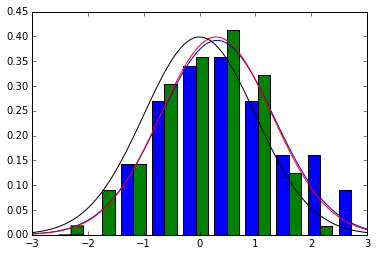

In [5]:
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp

n1 = norm(loc=0.3, scale=1.0)
n2 = norm(loc=0.0, scale=1.0)

n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

samples = np.concatenate([n1_samples, n2_samples], axis=0)

loc, scale = norm.fit(samples)

n = norm(loc=loc, scale=scale)


x = np.linspace(-3, 3, 100)
h = plt.hist([n1_samples, n2_samples], normed=True)

plt.plot(x,n.pdf(x), 'b-')
plt.plot(x,n1.pdf(x), 'r-')
plt.plot(x,n2.pdf(x), 'k-')